<a href="https://www.kaggle.com/code/olgaianina/spaceship-titanic-analyses?scriptVersionId=105098755" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#For visualization:
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train_x = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test_x = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

In [3]:
train_x.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
#We see many columns with unfilled data
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [6]:
#Classes are distributed almost equally.
print("Number of transported passengers (target=True) =", train_x['Transported'].sum())
print("Number of not transported passengers (target=False) =", train_x.shape[0]-train_x['Transported'].sum())

Number of transported passengers (target=True) = 4378
Number of not transported passengers (target=False) = 4315


<AxesSubplot:xlabel='HomePlanet', ylabel='Count'>

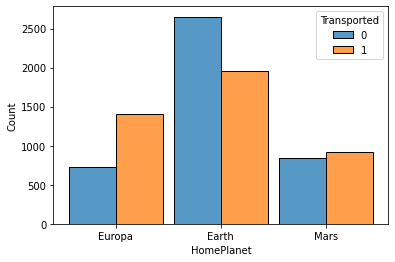

In [7]:
#As we can see on the graph: passengers from Europe were more likely to be transported to another dimension (almost in 2 times more often)
#than passengers from Mars (they have an equal ratio) or from Earth.
sns.histplot(x=train_x.HomePlanet, hue=train_x.Transported.astype(int), multiple="dodge", shrink=0.9)

<AxesSubplot:xlabel='CryoSleep', ylabel='Count'>

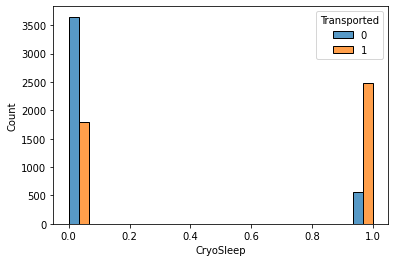

In [8]:
#Next feature - CryoSleep. The passengers with cryosleep were transported more often than passengers without.
sns.histplot(x=train_x.CryoSleep.astype(float), hue=train_x.Transported.astype(int), multiple="dodge")

<AxesSubplot:xlabel='Destination', ylabel='Count'>

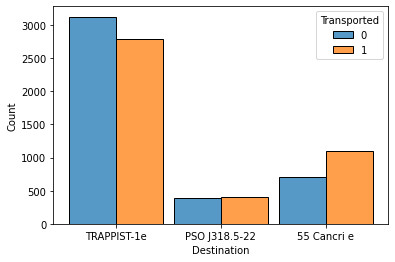

In [9]:
#The proportion between transported and not transported passengers is almost the same for all categories of column Destination.
sns.histplot(x=train_x.Destination, hue=train_x.Transported.astype(int), multiple="dodge", shrink=0.9)

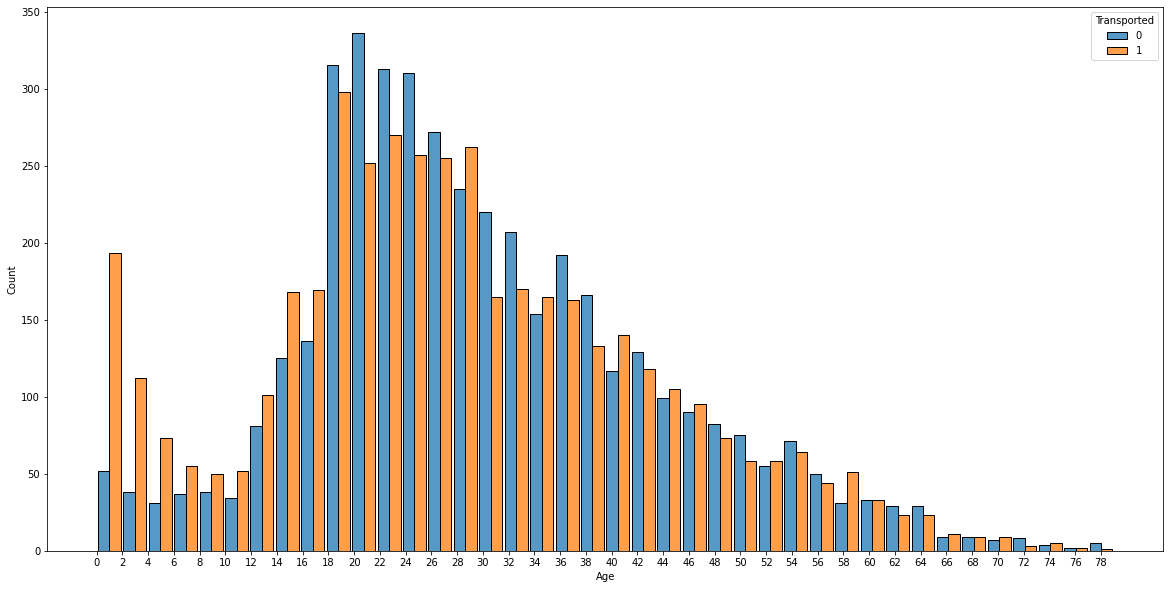

In [10]:
#On this graph we see that children were transported more often (especially in age till 6 years old) than people of other ages.
plt.figure(figsize=(20,10))
g = sns.histplot(x=train_x.Age, hue=train_x.Transported.astype(int), multiple="dodge", shrink=0.9, bins=40)
g.set_xticks(range(0,80,2))
plt.show()

<AxesSubplot:xlabel='VIP', ylabel='Count'>

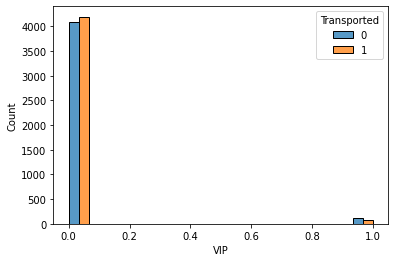

In [11]:
#VIP status has almost no effect on the transportation.
sns.histplot(x=train_x.VIP.astype(float), hue=train_x.Transported.astype(int), multiple="dodge")

<AxesSubplot:>

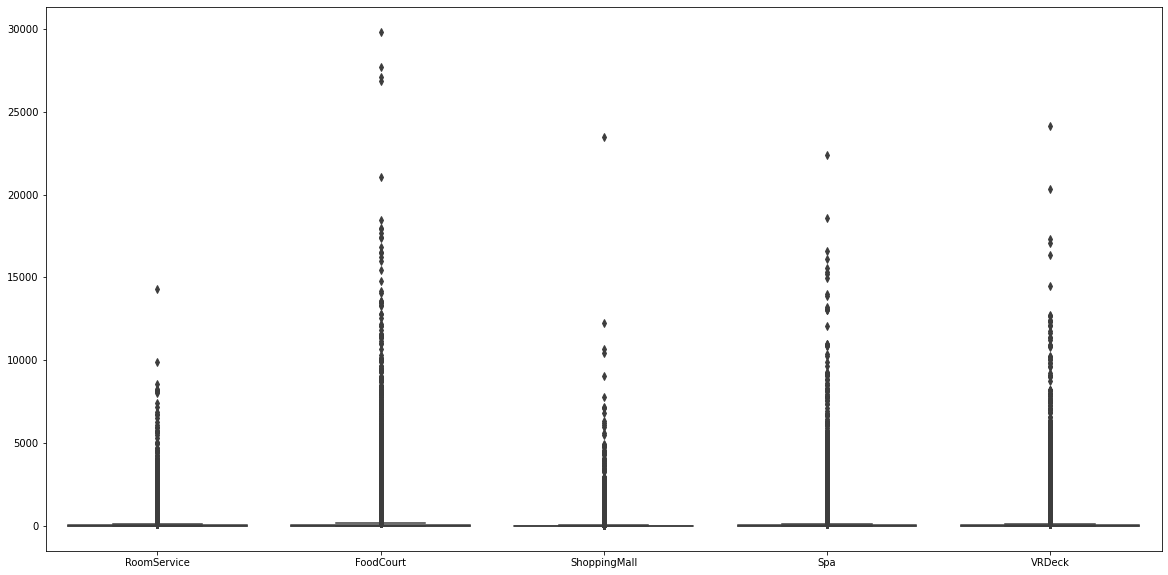

In [12]:
#On the graph below we can see that many passengers didn't use the amenities (services).
plt.figure(figsize=(20,10))
sns.boxplot(data=train_x[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])

In [13]:
#Let's make column that contains information about how many amenities (services) were be used by the passenger. 
#It contains values from 0 (the passenger didn't use any amenities) to 5.
train_x['NumberOfAmenities']=(train_x['RoomService'].astype(bool).astype(int)+train_x['FoodCourt'].astype(bool).astype(int)+
                                train_x['ShoppingMall'].astype(bool).astype(int)+train_x['Spa'].astype(bool).astype(int)+
                                train_x['VRDeck'].astype(bool).astype(int))
test_x['NumberOfAmenities']=(test_x['RoomService'].astype(bool).astype(int)+test_x['FoodCourt'].astype(bool).astype(int)+
                                test_x['ShoppingMall'].astype(bool).astype(int)+test_x['Spa'].astype(bool).astype(int)+
                                test_x['VRDeck'].astype(bool).astype(int))         

In [14]:
train_x.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,NumberOfAmenities
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,5
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,4
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,4
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,5


<AxesSubplot:xlabel='NumberOfAmenities', ylabel='Count'>

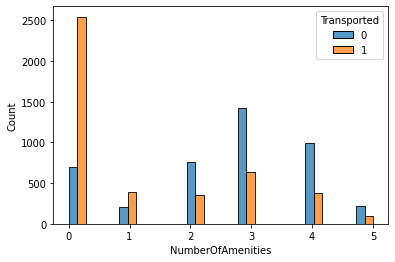

In [15]:
#The passengers who didn't use amenities or used 1 amenity were more often be transported to another dimension.
sns.histplot(x=train_x.NumberOfAmenities, hue=train_x.Transported.astype(int), multiple="dodge")

In [16]:
#Now we split column Cabin to 3 columns: Deck, CabinSide and CabinNumber 
#and extract information from PassengerId about how the passenger travelled: alone or in a group.
datasets = [train_x, test_x]
for d in datasets:
    nrows = d.shape[0]
    list_deck = [np.NaN for i in range(nrows)]
    list_side = [np.NaN for i in range(nrows)]
    list_number = [0 for i in range(nrows)]
    for i in range(nrows):
        if type(d['Cabin'][i]) == str:
            cab=d['Cabin'][i].split('/')
            list_deck[i] = cab[0]
            list_number[i] = cab[1]
            list_side[i] = cab[2]
    d['CabinDeck'] = list_deck
    d['CabinSide'] = list_side
    d['CabinNumber'] = list_number
    #Extract info from PassengerId
    list_ppl = [0 for i in range(nrows)]
    next_i = 0
    for i in range(nrows):
        if i < next_i and num_ppl != 0:
            continue
        a = d.iloc[i,0].split('_')[0]    
        next_i = i+1
        num_ppl = 0
        while True:
            if next_i >= nrows:
                break
            b = d.iloc[next_i,0].split('_')[0]
            if a != b:
                break
            num_ppl += 1
            next_i += 1  
        if num_ppl > 0:
            for ind in range(i,next_i):
                list_ppl[ind] = num_ppl
    d['IsAlone'] = [int(not bool(l)) for l in list_ppl]    

In [17]:
train_x.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,NumberOfAmenities,CabinDeck,CabinSide,CabinNumber,IsAlone
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,B,P,0,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,5,F,S,0,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,4,A,S,0,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,4,A,S,0,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,5,F,S,1,1


In [18]:
train_x.CabinDeck.value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: CabinDeck, dtype: int64

<AxesSubplot:xlabel='CabinDeck', ylabel='Count'>

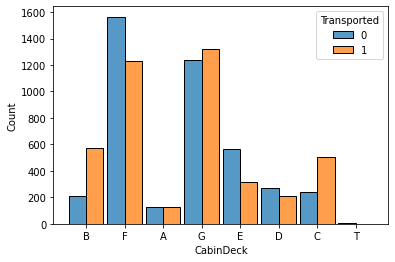

In [19]:
sns.histplot(x=train_x.CabinDeck, hue=train_x.Transported.astype(int), multiple="dodge", shrink=0.9)

In [20]:
train_x.CabinSide.value_counts()

S    4288
P    4206
Name: CabinSide, dtype: int64

<AxesSubplot:xlabel='CabinSide', ylabel='Count'>

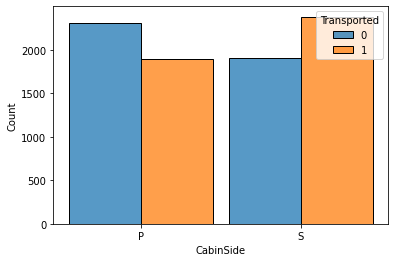

In [21]:
sns.histplot(x=train_x.CabinSide, hue=train_x.Transported.astype(int), multiple="dodge", shrink=0.9)

In [22]:
train_x.CabinNumber.value_counts()

0       199
82       28
86       22
19       22
56       21
       ... 
1644      1
1515      1
1639      1
1277      1
1894      1
Name: CabinNumber, Length: 1818, dtype: int64

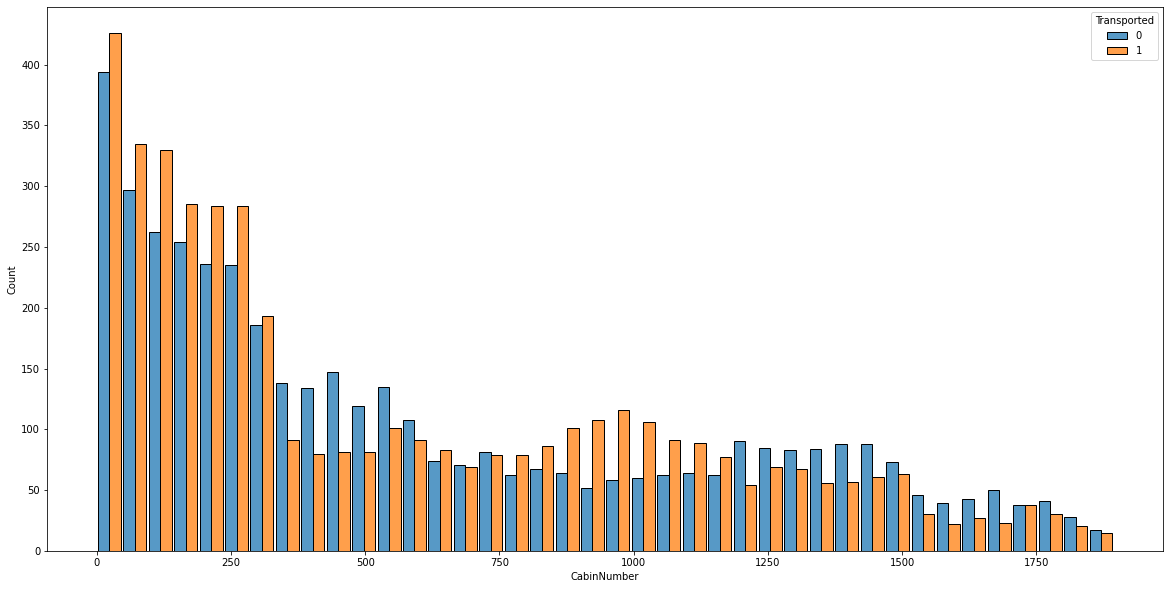

In [23]:
plt.figure(figsize=(20,10))
g = sns.histplot(x=train_x.CabinNumber.astype(float), hue=train_x.Transported.astype(int), multiple="dodge", shrink=0.9, bins=40)
plt.show()

In [24]:
#Save columns PassengerId for test data and Transported for train data in pandas series and drop unnecessary columns.
test_x_id = test_x['PassengerId']
train_y = train_x['Transported'].astype(int)
train_x = train_x.drop(['Transported'], axis=1)
train_x.drop(['PassengerId', 'Cabin', 'Name'], axis=1, inplace=True)
test_x.drop(['PassengerId', 'Cabin', 'Name'], axis=1, inplace=True)

In [25]:
train_x.info()
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HomePlanet         8492 non-null   object 
 1   CryoSleep          8476 non-null   object 
 2   Destination        8511 non-null   object 
 3   Age                8514 non-null   float64
 4   VIP                8490 non-null   object 
 5   RoomService        8512 non-null   float64
 6   FoodCourt          8510 non-null   float64
 7   ShoppingMall       8485 non-null   float64
 8   Spa                8510 non-null   float64
 9   VRDeck             8505 non-null   float64
 10  NumberOfAmenities  8693 non-null   int64  
 11  CabinDeck          8494 non-null   object 
 12  CabinSide          8494 non-null   object 
 13  CabinNumber        8693 non-null   object 
 14  IsAlone            8693 non-null   int64  
dtypes: float64(6), int64(2), object(7)
memory usage: 1018.8+ KB
<class 'pand

In [26]:
train_x.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,NumberOfAmenities,IsAlone
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,1.843552,0.552744
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,1.651508,0.497239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,3.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,5.000000,1.000000


In [27]:
#Start to transform data. We fill null data in columns Age and CabinNumber with median, in other numerical columns with value 0
#and in categorical columns with most frequent values.
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
num_cols = ['Age','CabinNumber']
num_cols_amount = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'] 
cat_cols = [col for col in train_x.columns if col not in num_cols and col not in num_cols_amount]
num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
num_amount_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant', fill_value = 0)),
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder',OrdinalEncoder())
])
preproc = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('num_amount', num_amount_transformer, num_cols_amount),
    ('cat', cat_transformer, cat_cols)
])
train_x = pd.DataFrame(preproc.fit_transform(train_x))
train_x.columns = num_cols+num_cols_amount+cat_cols
test_x = pd.DataFrame(preproc.fit_transform(test_x))
test_x.columns = num_cols+num_cols_amount+cat_cols

In [28]:
train_x.head()

,Age,CabinNumber,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Destination,VIP,NumberOfAmenities,CabinDeck,CabinSide,IsAlone
0,0.711945,-1.141624,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,1.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0
1,-0.334037,-1.141624,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,0.0,0.0,2.0,0.0,5.0,5.0,1.0,1.0
2,2.036857,-1.141624,-0.268001,1.959998,-0.283579,5.695623,-0.219796,1.0,0.0,2.0,1.0,4.0,0.0,1.0,0.0
3,0.293552,-1.141624,-0.333105,0.523010,0.336851,2.687176,-0.092818,1.0,0.0,2.0,0.0,4.0,0.0,1.0,0.0
4,-0.891895,-1.139678,0.125652,-0.237159,-0.031059,0.231374,-0.261240,0.0,0.0,2.0,0.0,5.0,5.0,1.0,1.0


In [29]:
test_x.head()

,Age,CabinNumber,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Destination,VIP,NumberOfAmenities,CabinDeck,CabinSide,IsAlone
0,-0.114147,-1.146527,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,0.0,1.0,2.0,0.0,0.0,6.0,1.0,1.0
1,-0.684313,-1.144593,-0.357339,-0.277879,-0.312173,2.287504,-0.246712,0.0,0.0,2.0,0.0,2.0,5.0,1.0,1.0
2,0.170937,-1.152328,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,1.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0
3,0.669832,-1.150395,-0.357339,4.121518,-0.312173,-0.104002,0.226648,1.0,0.0,2.0,0.0,3.0,2.0,1.0,1.0
4,-0.613042,-1.142660,-0.340723,-0.283840,0.832122,-0.267841,-0.246712,0.0,0.0,2.0,0.0,2.0,5.0,1.0,1.0


<AxesSubplot:>

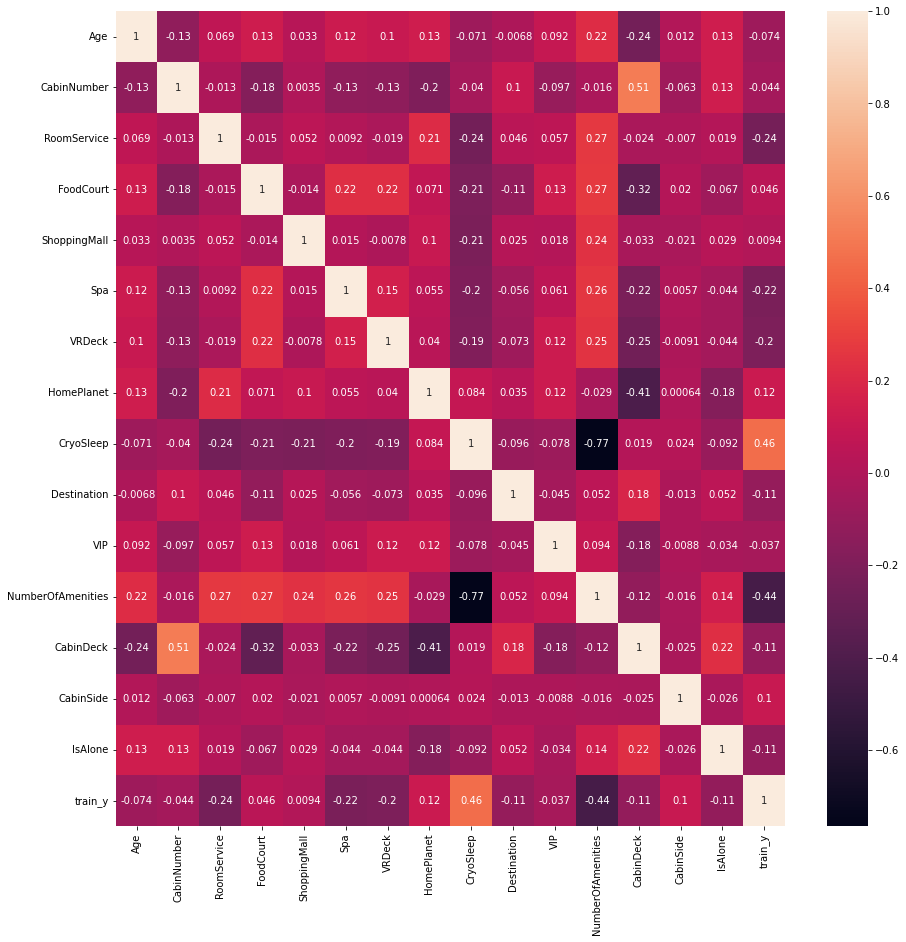

In [30]:
#Show heatmap with correlation between columns (+ target)
plt.figure(figsize=(15,15))
sns.heatmap(data=(train_x.assign(train_y=train_y)).corr(), annot=True)

<AxesSubplot:xlabel='NumberOfAmenities', ylabel='Count'>

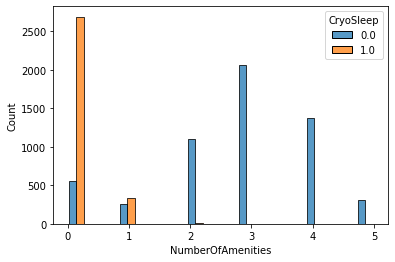

In [31]:
#It's interesting that there is a high correlation between columns "CryoSleep" and "NumberOfAmenities". 
#It maybe means that the passengers in cryosleep didn't have enough time to spend money for amenities (only for 1 amenity of 5 possible). 
sns.histplot(x=train_x.NumberOfAmenities, hue=train_x.CryoSleep, multiple="dodge", shrink=0.9)

In [32]:
#So we have to delete one of these columns "CryoSleep" and "NumberOfAmenities" because of multicollinearity (0.77). Let's drop column CryoSleep.
train_x.drop(['CryoSleep'],axis=1,inplace=True)
test_x.drop(['CryoSleep'],axis=1,inplace=True)

In [33]:
#Let's split train data to train and validation data
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=0)
print(train_x.shape)
print(val_x.shape)

(6954, 14)
(1739, 14)


In [34]:
#Use algorithm Support Vector Machines for Classification
from sklearn.svm import SVC
#The parameters for this model have been found using GridSearchCV on local machine.
#decision_function_shape='ovo' is one-vs-one decision function for binary classification (we have two classes: 0 and 1)
#kernel='rbf'. Specifies the kernel type to be used in the algorithm. Two parameters must be considered: "C" and "gamma". 
#The parameter "C", common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface.
#A low "C" makes the decision surface smooth, while a high "C" aims at classifying all training examples correctly. 
#"gamma" defines how much influence a single training example has. The larger "gamma" is, the closer other examples must be to be affected.
svc = SVC(random_state=0, decision_function_shape='ovo', kernel='rbf', C=4.0, gamma=0.03)
svc.fit(train_x, train_y)
y_pred_svc = svc.predict(test_x)
print(round(svc.score(train_x, train_y)*100,4), round(svc.score(val_x, val_y)*100,4))

80.7737 79.1259


In [35]:
result_data = pd.DataFrame()
result_data['PassengerId']=test_x_id
result_data['Transported'] = y_pred_svc.astype(bool)
result_data.to_csv("submission.csv", index=False)